In [1]:
import logging

import IPython.display
import graphcat.diagram

logging.basicConfig(level=logging.INFO)

In [2]:
def draw_graph(graph):
    agraph = graphcat.diagram.draw(graph)
    agraph.graph_attr["rankdir"] = "TB";
    IPython.display.display(IPython.display.SVG(data=agraph.draw(prog="dot", format="svg")))

INFO:graphcat.common:Task c executing. Inputs: {}
INFO:graphcat.common:Task c finished. Output: None


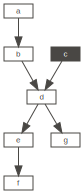

In [3]:
graph = graphcat.StaticGraph()
logger = graphcat.Logger(graph)

graph.add_task("a")
graph.add_task("b", graphcat.raise_exception(RuntimeError("whoops!")))
graph.add_task("c")
graph.add_task("d")
graph.add_task("e")
graph.add_task("f")
graph.add_task("g")

graph.set_links("a", "b")
graph.set_links("b", "d")
graph.set_links("c", "d")
graph.set_links("d", ["e", "g"])
graph.set_links("e", "f")

graph.update("c")

draw_graph(graph)

INFO:graphcat.common:Task a executing. Inputs: {}
INFO:graphcat.common:Task a finished. Output: None
INFO:graphcat.common:Task b executing. Inputs: {None: None}
ERROR:graphcat.common:Task b failed. Exception: whoops!


Exception: RuntimeError('whoops!')


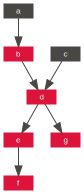

In [4]:
try:
    graph.update("f")
except Exception as e:
    print(f"Exception: {e!r}")
draw_graph(graph)